i HAVE TAKEN REFERENCE FROM MEDIUM ON GOOGLE BEST RESOURCES ARE AVAILABLE THERE 

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
import yfinance as yf
from datetime import datetime 
from tensorflow.keras.optimizers import Adam

In [53]:
# Using Yahoo finance we downloaded the data set from yahoo
symbol =['YESBANK.NS']

In [54]:
start_date="2005-9-16"

In [55]:
end_date='2025-10-10'

In [56]:
YES_BANK=yf.download(symbol , start_date , end_date , multi_level_index=False)
YES_BANK

C:\Users\za220\AppData\Local\Temp\ipykernel_23396\2279593354.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  YES_BANK=yf.download(symbol , start_date , end_date , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2005-09-16,12.775630,12.983437,11.727558,12.739490,2222495
2005-09-19,12.612998,12.911156,12.558787,12.911156,3858115
2005-09-20,12.441332,12.721419,12.305805,12.721419,5424665
2005-09-21,11.808874,12.549753,11.483611,12.468437,16822765
2005-09-22,11.546856,11.890190,11.492646,11.890190,5662030
...,...,...,...,...,...
2025-10-03,21.850000,21.969999,21.680000,21.760000,108054972
2025-10-06,21.930000,22.190001,21.780001,21.900000,103492711
2025-10-07,22.219999,22.360001,21.940001,21.950001,120108122


In [57]:
YES_BANK.index=pd.to_datetime(YES_BANK.index , errors="raise",)

In [58]:
YES_BANK.index

DatetimeIndex(['2005-09-16', '2005-09-19', '2005-09-20', '2005-09-21',
               '2005-09-22', '2005-09-23', '2005-09-26', '2005-09-27',
               '2005-09-28', '2005-09-29',
               ...
               '2025-09-26', '2025-09-29', '2025-09-30', '2025-10-01',
               '2025-10-02', '2025-10-03', '2025-10-06', '2025-10-07',
               '2025-10-08', '2025-10-09'],
              dtype='datetime64[ns]', name='Date', length=4951, freq=None)

In [59]:
YES_BANK.shape

(4951, 5)

In [60]:
# Test Traning data, Train data 
test_length= len(YES_BANK) * .2
test_length

990.2

In [61]:
training_data=YES_BANK[: -990]

In [62]:
training_data

,Close,High,Low,Open,Volume
Date,,,,,
2005-09-16,12.775630,12.983437,11.727558,12.739490,2222495
2005-09-19,12.612998,12.911156,12.558787,12.911156,3858115
2005-09-20,12.441332,12.721419,12.305805,12.721419,5424665
2005-09-21,11.808874,12.549753,11.483611,12.468437,16822765
2005-09-22,11.546856,11.890190,11.492646,11.890190,5662030
...,...,...,...,...,...
2021-10-05,13.100000,13.200000,13.000000,13.100000,96849882
2021-10-06,13.050000,13.500000,13.000000,13.150000,124309047
2021-10-07,13.150000,13.450000,12.850000,13.150000,150895888


In [63]:
testing_data=YES_BANK[-990:]
testing_data

,Close,High,Low,Open,Volume
Date,,,,,
2021-10-12,13.200000,13.350000,13.000000,13.100000,107152589
2021-10-13,13.250000,13.350000,13.200000,13.300000,76105307
2021-10-14,13.200000,13.450000,13.200000,13.250000,82128218
2021-10-18,13.950000,14.350000,13.350000,13.450000,327306508
2021-10-19,13.600000,14.250000,13.500000,14.100000,146859092
...,...,...,...,...,...
2025-10-03,21.850000,21.969999,21.680000,21.760000,108054972
2025-10-06,21.930000,22.190001,21.780001,21.900000,103492711
2025-10-07,22.219999,22.360001,21.940001,21.950001,120108122


In [90]:
scaler=MinMaxScaler(feature_range=(0,1))
feature=MinMaxScaler(feature_range=(0,1))

In [103]:
training_y=training_data['Open'] # Currently in object data type
training_y=np.array(training_y)
training_y=training_y.reshape(-1, 1)

training_y_scaler=feature.fit_transform(training_y)
training_data_scaler=scaler.fit_transform(training_data)
testing_data_scaler=scaler.fit_transform(testing_data)

training_data_scaler,
training_y_scaler



array([[0.01295235],
       [0.0133998 ],
       [0.01290525],
       ...,
       [0.01402234],
       [0.01441331],
       [0.01441331]], shape=(3961, 1))

In [92]:
training_y_scaler.shape

(3961, 1)

In [93]:
training_y_scaler

array([[0.01295235],
       [0.0133998 ],
       [0.01290525],
       ...,
       [0.01402234],
       [0.01441331],
       [0.01441331]], shape=(3961, 1))

In [94]:
# So take care of this part 
# Here we are going to create x_train , y_train 
def createXY(dataset, window_size):
    data_x=[]
    data_y=[]
    for i in range(window_size,len(dataset)):
        data_x.append(dataset[i-window_size:i , 0:dataset.shape[1]])
        data_y.append(dataset[i , 3])
    return np.array(data_x) , np.array(data_y)        
        

In [95]:
train_x , train_y=createXY(training_data_scaler , 30)
test_x , test_y=createXY(testing_data_scaler, 30)

In [96]:
train_y

array([0.00986733, 0.01092707, 0.01076223, ..., 0.01402234, 0.01441331,
       0.01441331], shape=(3931,))

In [97]:
train_x.shape

(3931, 30, 5)

In [98]:
train_y.shape

(3931,)

In [26]:
# using lstm model with multiple layer taking care of overfitting with dropout layer and for better accuracy use dense layer 

In [ ]:
model=Sequential()
model.add(LSTM(units=100 , return_sequences=True  , activation='tanh', input_shape=[30 , 5]))
# add drop out layer after each lstm model to avoid over fitting in the model
model.add(Dropout(0.2))

model.add(LSTM(units=100 , return_sequences=True , activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units=100 , return_sequences=True , activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units=100 , activation='tanh' ))
model.add(Dropout(0.2))

#At the end add dense layer which take input from the previous one and extract the output 
model.add(Dense(1 , activation='linear'))

# Now add optimzer known add adam optimizer what is the use of it 
# Use the Adam optimizer: it adapts learning rates for each parameter and works well for deep learning models.

# For regression (predicting a single value), use 'mean_squared_error' or 'mean_absolute_error' as your loss function.
model.compile(optimizer=Adam(learning_rate=0.001) , loss='mean_squared_error' ,  metrics=['mae', 'mse'] )
model.fit(train_x , train_y, batch_size=30 , epochs=40)

C:\Users\za220\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - loss: 0.0036 - mae: 0.0321 - mse: 0.0036
Epoch 2/40
 76/132 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 0.0029 - mae: 0.0310 - mse: 0.0029 

In [99]:
print(test_y.shape)

(960,)


In [105]:
y_pred = model.predict(test_x)           
y_pred = y_pred.reshape(-1, 1)              


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


In [106]:

y_pred=feature.inverse_transform(y_pred)

In [124]:
y_pred.shape

(960, 1)

In [135]:
testing_data_plot=testing_data['Open']
testing_data_plot
testing_data_df=pd.DataFrame(testing_data_plot)

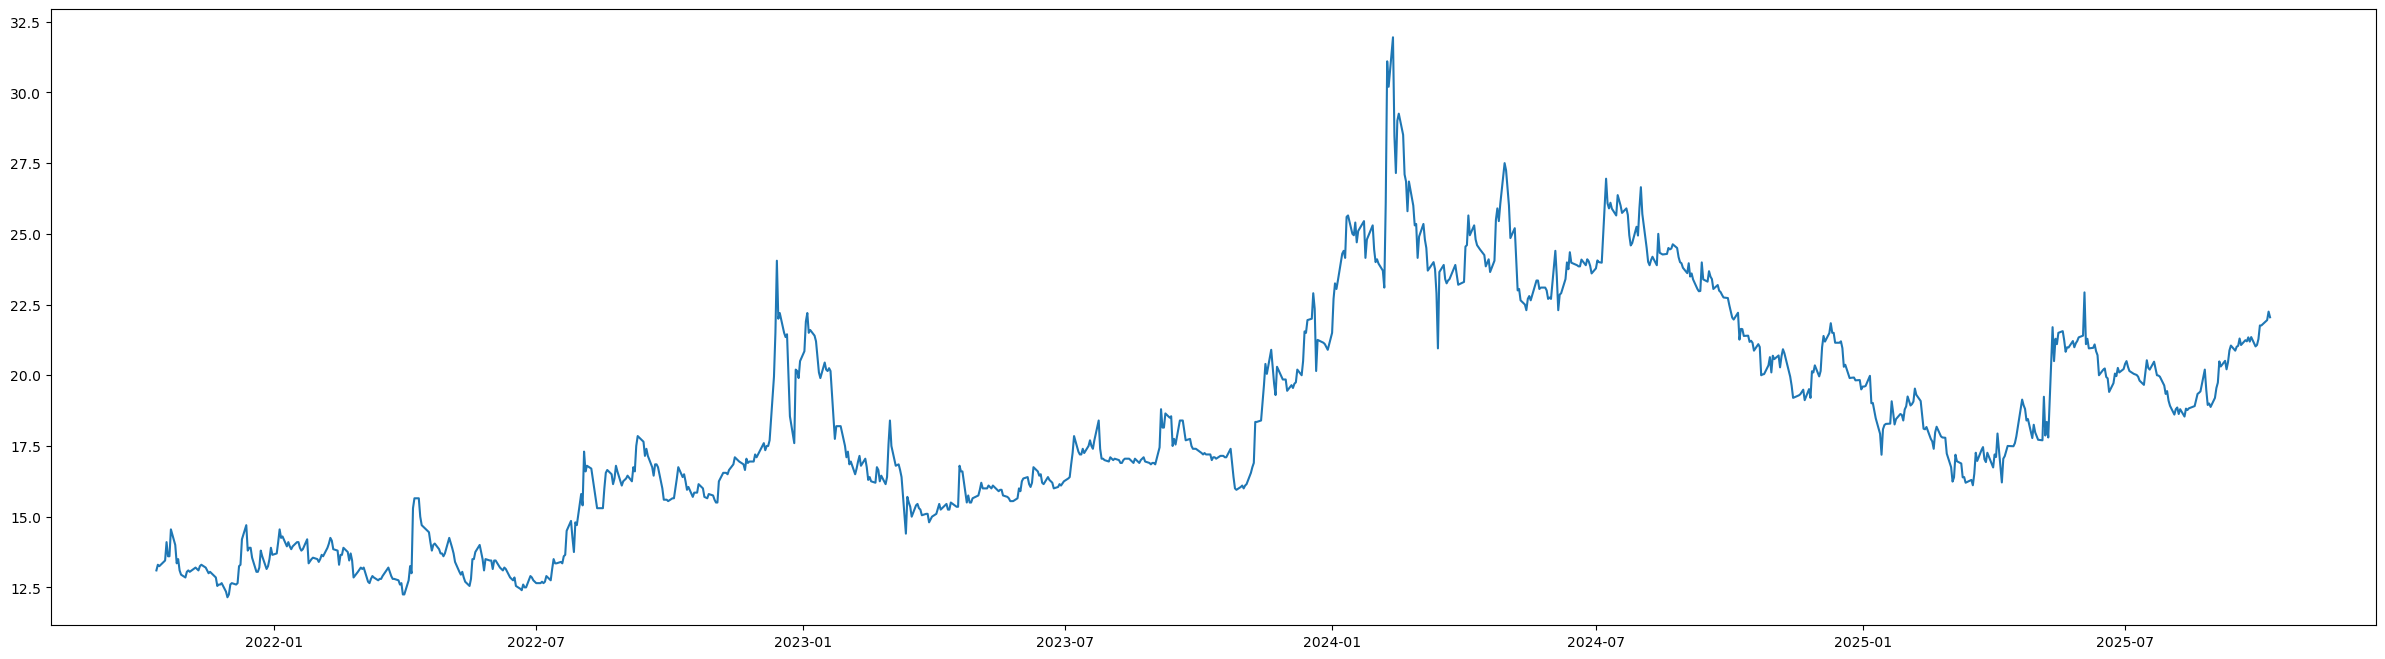

In [131]:
plt.figure(figsize=(30,8))
plt.plot(testing_data_plot)

plt.show()

In [132]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [133]:
df=pd.DataFrame(y_pred)

In [134]:
df

,0
0,16.249586
1,15.274453
2,14.163009
3,12.761802
4,11.455869
...,...
955,192.850937
956,196.271805
957,199.520218
958,202.240631


In [140]:
df.index=testing_data_df[30:].index

In [141]:
df

,0
Date,
2021-11-26,16.249586
2021-11-29,15.274453
2021-11-30,14.163009
2021-12-01,12.761802
2021-12-02,11.455869
...,...
2025-10-03,192.850937
2025-10-06,196.271805
2025-10-07,199.520218


C:\Users\za220\AppData\Local\Temp\ipykernel_23396\1419216977.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


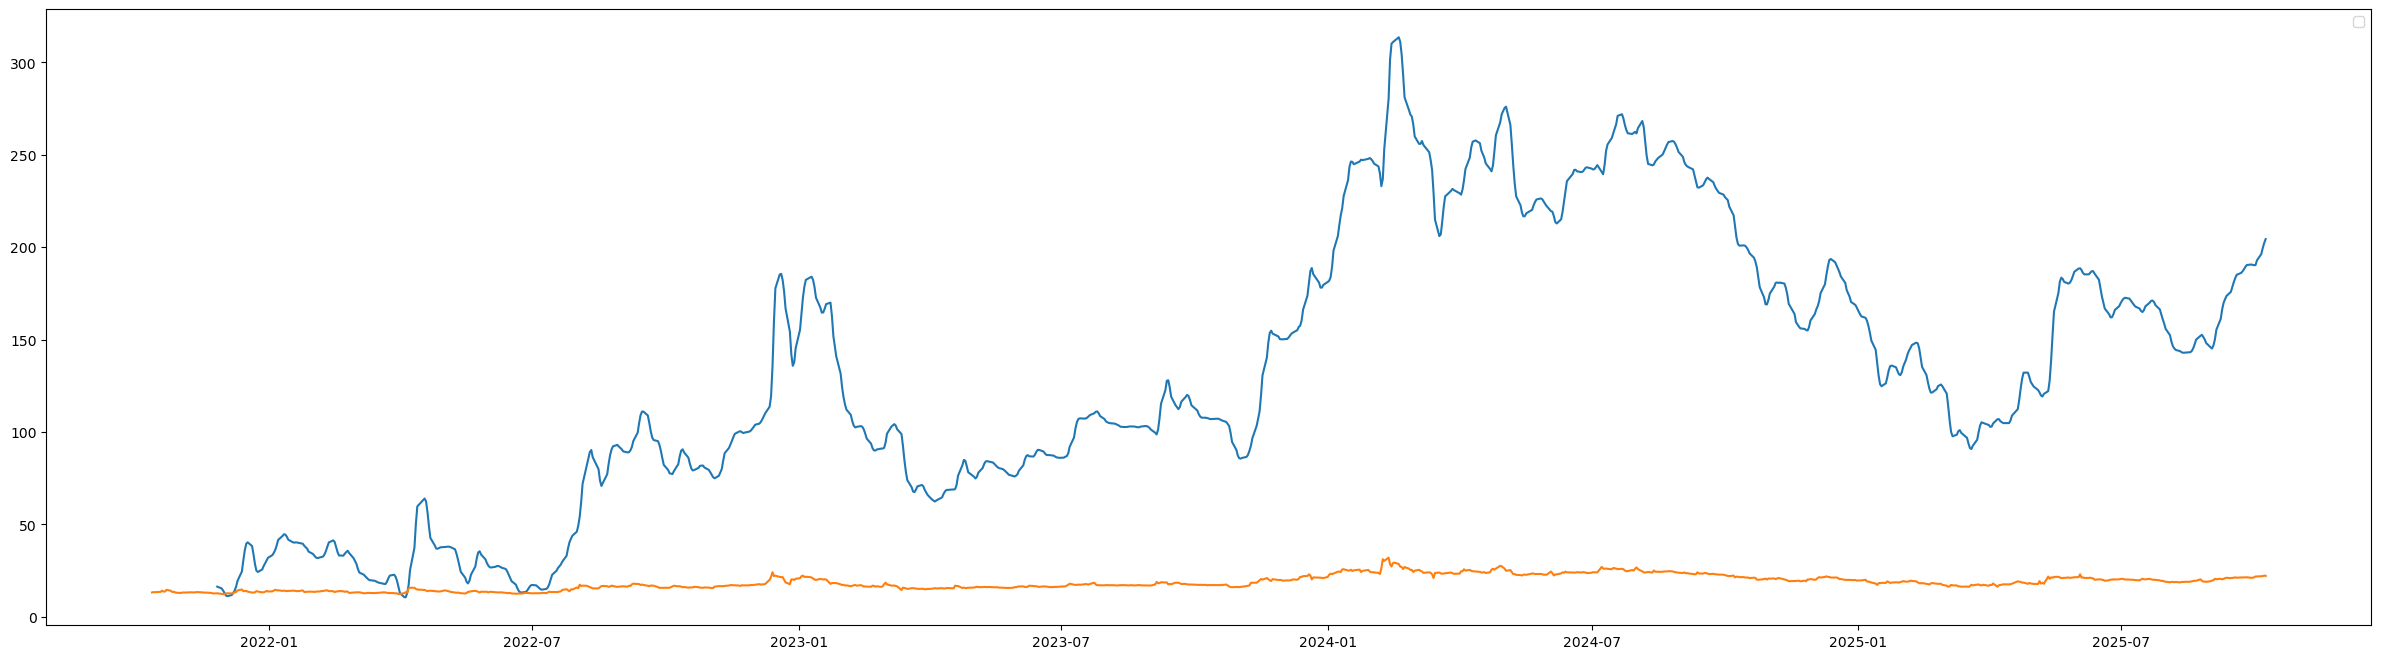

In [144]:
plt.figure(figsize=(30,8))
plt.plot(df)
plt.plot(testing_data_df)
plt.show()